In [ ]:
import re

def split_into_sentences(paragraph):
    # Define sentence boundary regex pattern
    sentence_boundary = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"

    # Split the paragraph into sentences using the regex pattern
    sentences = re.split(sentence_boundary, paragraph)

    # Remove any leading or trailing whitespace from each sentence
    sentences = [sentence.strip() for sentence in sentences]

    return sentences

# Given paragraph
paragraph = """
For the purposes of the present document, the terms and definitions given in TR 21.905 [1] and the following apply. A term defined in the present document takes precedence over the definition of the same term, if any, in TR 21.905 [1].
5G VN Group: A set of UEs using private communication for 5G LAN-type service.
5G Access Network: An access network comprising a NG-RAN and/or non-3GPP AN connecting to a 5G Core Network.
5G Access Stratum-based Time Distribution: A time synchronization distribution method that is used by an NG-RAN to provide the 5GS time to the UE(s) over the radio interface using procedures specified in TS 38.331 [28].
5G Core Network: The core network specified in the present document. It connects to a 5G Access Network.
5G LAN-Type Service: A service over the 5G system offering private communication using IP and/or non-IP type communications.
5G LAN-Virtual Network: A virtual network over the 5G system capable of supporting 5G LAN-type service.
5G NSWO: The 5G NSWO is the capability provided by 5G system and by UE to enable the connection to a WLAN access network using 5GS credentials without registration to 5GS.
5G QoS Flow or QoS Flow: The finest granularity for QoS forwarding treatment in the 5G System. All traffic mapped to the same 5G QoS Flow receive the same forwarding treatment (e.g. scheduling policy, queue management policy, rate shaping policy, RLC configuration, etc.). Providing different QoS forwarding treatment requires separate 5G QoS Flow.
5G QoS Identifier: A scalar that is used as a reference to a specific QoS forwarding behaviour (e.g. packet loss rate, packet delay budget) to be provided to a 5G QoS Flow. This may be implemented in the access network by the 5QI referencing node specific parameters that control the QoS forwarding treatment (e.g. scheduling weights, admission thresholds, queue management thresholds, link layer protocol configuration, etc.).
5G System: 3GPP system consisting of 5G Access Network (AN), 5G Core Network and UE.
5G-BRG: The 5G-BRG is a 5G-RG defined in BBF.
5G-CRG: The 5G-CRG is a 5G-RG specified in DOCSIS MULPI [89].
5G-RG: A 5G-RG is a RG capable of connecting to 5GC playing the role of a UE with regard to the 5G core. It supports secure element and exchanges N1 signalling with 5GC. The 5G-RG can be either a 5G-BRG or 5G-CRG.
Access Traffic Steering: The procedure that selects an access network for a new data flow and transfers the traffic of this data flow over the selected access network. Access traffic steering is applicable between one 3GPP access and one non-3GPP access.
Access Traffic Switching: The procedure that moves all traffic of an ongoing data flow from one access network to another access network in a way that maintains the continuity of the data flow. Access traffic switching is applicable between one 3GPP access and one non-3GPP access.
Access Traffic Splitting: The procedure that splits the traffic of a data flow across multiple access networks. When traffic splitting is applied to a data flow, some traffic of the data flow is transferred via one access and some other traffic of the same data flow is transferred via another access. Access traffic splitting is applicable between one 3GPP access and one non-3GPP access.
Allowed NSSAI: Indicating the S-NSSAIs values the UE could use in the Serving PLMN in the current Registration Area.
Allowed Area: Area where the UE is allowed to initiate communication as specified in clause 5.3.2.3.
Alternative S-NSSAI: Indicating a compatible S-NSSAI for an S-NSSAI in the Allowed NSSAI that the AMF uses to replace an S-NSSAI when the S-NSSAI is not available or congested, as specified in clause 5.15.19.
AMF Region: An AMF Region consists of one or multiple AMF Sets.
AMF Set: An AMF Set consists of some AMFs that serve a given area and Network Slice(s). AMF Set is unique within an AMF Region and it comprises of AMFs that support the same Network Slice(s). Multiple AMF Sets may be defined per AMF Region. The AMF instances in the same AMF Set may be geographically distributed but have access to the same context data.
Application Identifier: An identifier that can be mapped to a specific application traffic detection rule.
AUSF Group ID: This refers to one or more AUSF instances managing a specific set of SUPIs. An AUSF Group consists of one or multiple AUSF Sets.
"""

# Split paragraph into sentences
sentences = split_into_sentences(paragraph)



In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Sentence embeddings:
tensor([[-0.0735, -0.0009,  0.0035,  ...,  0.0870,  0.0693,  0.0110],
        [-0.0365, -0.0063,  0.1043,  ..., -0.0097,  0.0550,  0.0216],
        [-0.0729,  0.0368,  0.0969,  ...,  0.0283, -0.0329,  0.0609],
        ...,
        [ 0.0007, -0.0424, -0.0358,  ...,  0.0627,  0.0534, -0.0002],
        [ 0.0013, -0.0300, -0.0824,  ...,  0.0005, -0.0364, -0.0003],
        [-0.1188,  0.0483, -0.0025,  ...,  0.1264,  0.0465, -0.0157]])


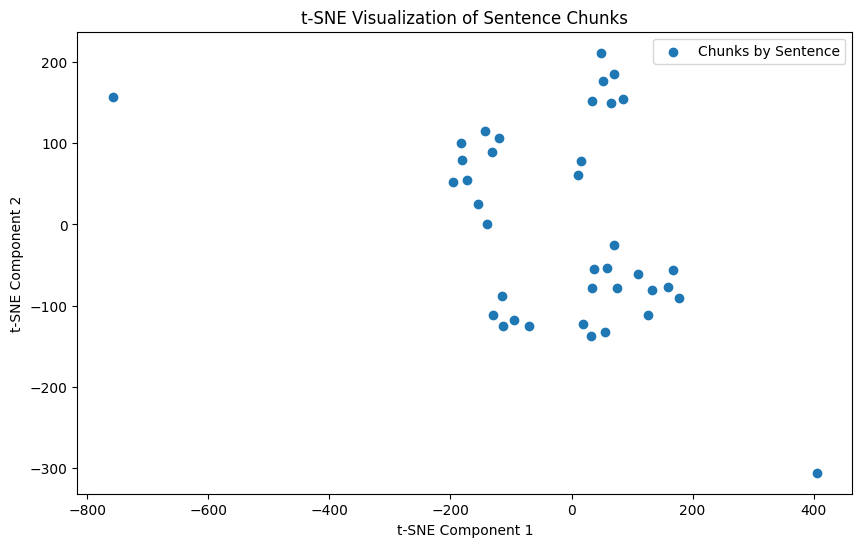

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming the chunk vectors are already prepared (here simulated as random)
# For demonstration, let's simulate vectorization with random vectors

# Apply t-SNE to each set of vectors
tsne_model_sentence = TSNE(n_components=2, perplexity=min(5, len(sentence_embeddings)-1), random_state=42)



reduced_vectors_sentence = tsne_model_sentence.fit_transform(sentence_embeddings)

# Plotting - Chunks by Sentence
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_sentence[:, 0], reduced_vectors_sentence[:, 1], label='Chunks by Sentence', marker='o')
plt.title('t-SNE Visualization of Sentence Chunks')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



In [ ]:
import re

def split_into_sentences(paragraph):
    # Define sentence boundary regex pattern
    sentence_boundary = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"

    # Split the paragraph into sentences using the regex pattern
    sentences = re.split(sentence_boundary, paragraph)

    # Remove any leading or trailing whitespace from each sentence
    sentences = [sentence.strip() for sentence in sentences]

    return sentences

paragraph1 = """Architecture reference model
4.2.1	General
This specification describes the architecture for the 5G system. The interaction between network functions is represented in two ways.
-	A service-based representation, where network functions (e.g. AMF) within the control plane enables other authorized network functions to access their services. This representation also includes point-to-point reference points where necessary.
-	A reference point representation, focusing on the interactions between pairs of network functions described by point-to-point reference point (e.g. N11) between any two network functions (e.g. AMF and SMF) is depicted when some interaction exists between these two network functions.
Service-based interfaces are listed in sub-clause 4.2.4. Reference points are listed in sub-clause 4.2.5.
Network functions within the 5G Core Control Plane unless explicitly stated otherwise, shall exhibit service-based interfaces for services that can be used by other authorized network functions.
NOTE:	This will be evaluated on a case by case basis when specifying the procedure.
Editor's note:	The above two statements will be revisited when the work on system procedure is stable.
4.2.2	Network Functions and entities
The 5G System architecture consists of the following network functions (NF). The functional description of these network functions is specified in clause 6.
-	Authentication Server Function (AUSF)
-	Core Access and Mobility Management Function (AMF)
-	Data network (DN), e.g. operator services, Internet access or 3rd party services
-	Data Storage network function (DSF)
Editor's note:	Different data storage functions can be used for storing structured data from NEF and storing opaque data from NF. How this is captured is FFS.
-	Network Exposure Function (NEF)
-	NF Repository Function (NRF)
-	Policy Control function (PCF)
-	Session Management Function (SMF)
-	Unified Data Management (UDM)
-	User plane Function (UPF)
-	User Equipment (UE)
-	(Radio) Access Network ((R)AN)
4.2.3	Non-roaming reference architecture
Figure 4.2.3-1 depicts the non-roaming reference architecture with service-based interfaces within the Control Plane.
NOTE 1:	N9, N14 are not shown in all other figures however they may also be applicable for other scenarios.
NOTE 2:	For the sake of clarity of the point-to-point diagrams, the NEF and NRF have not been depicted. However, all depicted Network Functions can interact with the NEF and NRF as necessary.
4.2.5	Service-based interfaces
The 5G System Architecture contains the following service-based interfaces:
Namf:	Service-based interface exhibited by AMF.
Nsmf:	Service-based interface exhibited by SMF.
Nnef:	Service-based interface exhibited by NEF.
Npcf:	Service-based interface exhibited by PCF.
Nudm:	Service-based interface exhibited by UDM.
Naf:	Service-based interface exhibited by AF.
Nnrf:	Service-based interface exhibited by NRF.
Nausf:	Service-based interface exhibited by AUSF.
4.2.6	Reference points
The 5G System Architecture contains the following reference points:
N1:	Reference point between the UE and the Access and Mobility Management function.
N2:	Reference point between the (R)AN and the Access and Mobility Management function.
N3:	Reference point between the (R)AN and the User plane function (UPF).
N4:	Reference point between the Session Management function (SMF) and the User plane function (UPF).
N5:	Reference point between the Policy Function (PCF) and an Application Function (AF).
N6:	Reference point between the UP function (UPF) and a Data Network (DN).
NOTE:	The traffic forwarding details of N6 between a UPF acting as an uplink classifier and a local data network will not be specified in this release.
N7:	Reference point between the Session Management function (SMF) and the Policy Control function (PCF).
N7r:	Reference point between the vPCF and the hPCF.
N8:	Reference point between Unified Data Management and AMF.
N9:	Reference point between two Core User plane functions (UPFs).
N10:	Reference point between UDM and SMF.
N11:	Reference point between Access and Mobility Management function (AMF) and Session Management function (SMF).
N12:	Reference point between Access and Mobility Management function (AMF) and Authentication Server function (AUSF).
N13:	Reference point between UDM and Authentication Server function (AUSF).
N14:	Reference point between two Access and Mobility Management functions (AMFs).
N15:	Reference point between the PCF and the AMF in case of non-roaming scenario, V-PCF and AMF in case of roaming scenario.
N16:	Reference point between two SMFs, (in roaming case between V-SMF and the H-SMF).
4.2.7	Support of non-3GPP access
Editor's note:	This should include non-roaming and roaming reference architecture for support of non-3GPP access. To start with, Rel-15 will include support for untrusted access.
4.2.7.1	General Concepts to Support Non-3GPP Access
The 5G core network supports the connectivity of UE via non-3GPP access networks, e.g. WLAN access.
Only the support of non-3GPP access networks deployed outside the NG-RAN (referred to as "standalone" non-3GPP accesses) is described in this clause.
In this release of specification, 5G core network only supports untrusted non-3GPP accesses.
The N2 and N3 interfaces are used to connect standalone non-3GPP accesses to 5G core network control-plane functions and user-plane functions respectively.
A UE, which accesses the 5G core network over a standalone non-3GPP access, shall support NAS signalling with 5G core network control-plane functions using N1 interface after UE attachment.
When a UE is connected via a 3GPP RAN and via standalone non-3GPP accesses, multiple N1 interfaces shall exist for the UE i.e. one N1 interface over 3GPP RAN and one N1 interface over non-3GPP access.
When a UE is simultaneously connected to the same PLMN of 5G core network over 3GPP access and non-3GPP access, the UE shall be served by a single AMF.
Non-3GPP access networks are connected to 5G core network via a Non-3GPP InterWorking Function (N3IWF). The N3IWF interfaces to 5G core network control-plane functions and user-plane functions via N2 interface and N3 interface, respectively.
A UE establishes IPSec tunnel with a N3IWF to attach to 5G core network over untrusted non-3GPP access. The UE is authenticated by and attached to the 5G core network during the IPSec tunnel establishment procedure. Further details for UE attachment to 5G core network over untrusted non-3GPP access are described in clause 5.2.4.
Editor's note:	it is FFS whether the UE attaches to non-3GPP access without establishing any PDU sessions, or if the UE always performs an attach with a PDU session establishment.
Editor's note:	it is FFS what the UE status the AMF maintains when the UE moves all the PDU sessions to a 3GPP access and whether the N2 connection to the N3IWF is maintained.
N1 NAS signalling over standalone non-3GPP accesses is protected with the same security mechanism applied for N1 over a 3GPP access.
Editor's note:	Name of N3IWF may need to be changed.
Editor's note:	How QoS is supported via the N3IWF and untrusted non-3GPP accesses is FFS."""

sentences1 = split_into_sentences(paragraph1)


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input1 = tokenizer(sentences1, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input1)

# Perform pooling
sentence_embeddings1 = mean_pooling(model_output, encoded_input1['attention_mask'])

# Normalize embeddings
sentence_embeddings1 = F.normalize(sentence_embeddings1, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings1)


Sentence embeddings:
tensor([[ 0.0026, -0.0027,  0.0463,  ...,  0.0857, -0.0519,  0.0161],
        [ 0.0028, -0.0238,  0.0035,  ...,  0.0659,  0.0449, -0.0859],
        [-0.0512, -0.0125, -0.0473,  ...,  0.0575,  0.0848, -0.0634],
        ...,
        [-0.0793, -0.0342, -0.0120,  ...,  0.0188,  0.0537,  0.0350],
        [-0.0538, -0.0515, -0.0862,  ..., -0.1003,  0.0503,  0.0757],
        [-0.0705, -0.0567, -0.0905,  ..., -0.0391,  0.0961,  0.0928]])


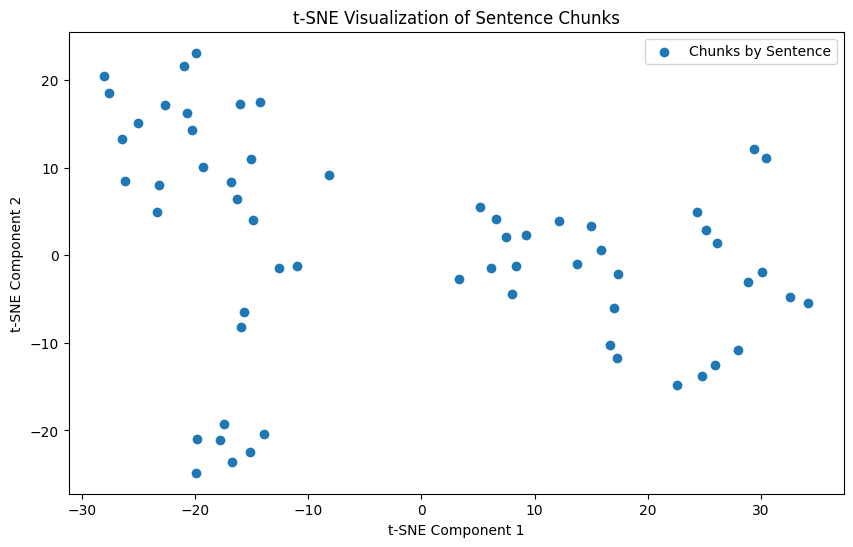

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming the chunk vectors are already prepared (here simulated as random)
# For demonstration, let's simulate vectorization with random vectors

# Apply t-SNE to each set of vectors
tsne_model_sentence = TSNE(n_components=2, perplexity=min(5, len(sentence_embeddings1)-1), random_state=42)



reduced_vectors_sentence = tsne_model_sentence.fit_transform(sentence_embeddings1)

# Plotting - Chunks by Sentence
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_sentence[:, 0], reduced_vectors_sentence[:, 1], label='Chunks by Sentence', marker='o')
plt.title('t-SNE Visualization of Sentence Chunks')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



In [ ]:
paragraph2 = """
How is the architecture of the 5G system described in terms of network function interactions?
What are the two main representations used to depict the interaction between network functions in the 5G system architecture?
What network functions are included in the 5G Core Control Plane, and what are their primary functionalities?
How are service-based interfaces defined within the 5G system architecture, and what functions do they serve?
Can you list the reference points present in the 5G system architecture, and describe the interactions they facilitate between network functions?
How are non-roaming scenarios depicted in the 5G system architecture, and what reference points are involved?
What is the purpose of the Network Exposure Function (NEF) and the NF Repository Function (NRF) in the 5G system architecture?
How are service-based interfaces named within the 5G system architecture, and what functions do they represent?
Can you explain the role of reference points N1 through N16 in the 5G system architecture, and the interactions they facilitate?
How does the 5G core network support non-3GPP access, and what are the key concepts involved?
What types of non-3GPP access networks does the 5G core network support, and how are they connected?
What interfaces are used to connect standalone non-3GPP accesses to the 5G core network control-plane and user-plane functions?
What signaling mechanism does a UE use to communicate with 5G core network control-plane functions over a standalone non-3GPP access?
How does a UE handle connections to both 3GPP RAN and standalone non-3GPP accesses within the same PLMN of the 5G core network?
What function does the Non-3GPP InterWorking Function (N3IWF) serve in connecting non-3GPP access networks to the 5G core network?
What security measures are applied to protect NAS signaling over standalone non-3GPP accesses?
What considerations are made regarding QoS support via the N3IWF and untrusted non-3GPP accesses?
How are interactions between the UE and the Access and Mobility Management function (AMF) represented in the architecture?
Can you describe the interactions between the (R)AN and the User plane function (UPF) in the 5G system architecture?
What is the role of the Network Exposure Function (NEF) in the 5G system, and how does it interact with other network functions?
How does the Session Management function (SMF) interact with the User plane function (UPF) in the 5G system architecture?
What reference points are involved in the interaction between the Policy Function (PCF) and an Application Function (AF)?
Can you explain the interactions between the Unified Data Management (UDM) and the Access and Mobility Management function (AMF)?
How does the authentication process work between the Access and Mobility Management function (AMF) and the Authentication Server function (AUSF)?
What interactions occur between the Unified Data Management (UDM) and the Authentication Server function (AUSF) in the 5G system architecture?
How does the User Equipment (UE) interact with the Access and Mobility Management function (AMF) in the 5G system architecture?
Can you describe the interactions between the User Equipment (UE) and the User plane function (UPF) in the 5G system architecture?
What reference points facilitate the interactions between different Access and Mobility Management functions (AMFs) in the 5G system architecture?
How does the Policy Control function (PCF) communicate with the Access and Mobility Management function (AMF) in both roaming and non-roaming scenarios?
What considerations are made regarding traffic forwarding between the User plane function (UPF) and a Data Network (DN) in the 5G system architecture?
"""

questions1 = split_into_sentences(paragraph2)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input2 = tokenizer(questions1, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input2)

# Perform pooling
question_embeddings1 = mean_pooling(model_output, encoded_input2['attention_mask'])

# Normalize embeddings
question_embeddings1 = F.normalize(question_embeddings1, p=2, dim=1)



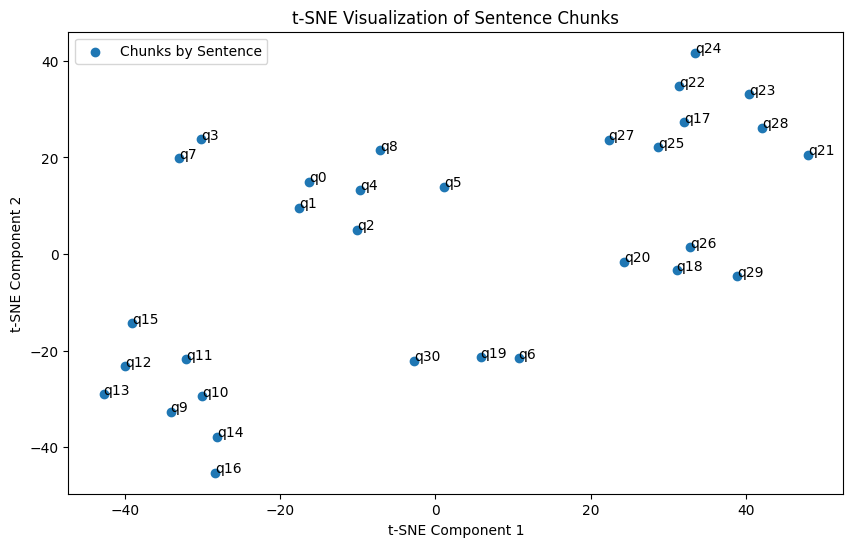

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming the chunk vectors are already prepared (here simulated as random)
# For demonstration, let's simulate vectorization with random vectors

# Generate some sample question labels (replace this with your actual question labels)
question_labels = ['q{}'.format(i) for i in range(len(question_embeddings1))]

# Apply t-SNE to each set of vectors
tsne_model_sentence = TSNE(n_components=2, perplexity=min(5, len(question_embeddings1)-1), random_state=42)
reduced_vectors_sentence = tsne_model_sentence.fit_transform(question_embeddings1)

# Plotting - Chunks by Sentence
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_sentence[:, 0], reduced_vectors_sentence[:, 1], label='Chunks by Sentence', marker='o')

# Annotate each point with the corresponding question label
for i, label in enumerate(question_labels):
    plt.annotate(label, (reduced_vectors_sentence[i, 0], reduced_vectors_sentence[i, 1]))

plt.title('t-SNE Visualization of Sentence Chunks')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [ ]:
paragraph3 = '''
How does the non-roaming architecture for non-3GPP accesses differ from the roaming architecture?
What network elements are involved in supporting untrusted non-3GPP access networks?
What functionalities does the AMF include to support non-3GPP access networks?
What functionalities does the N3IWF provide in the case of untrusted non-3GPP access?
Can you describe the reference points specific to non-3GPP access in the 5G system architecture?
How is SMS over NAS supported in the 5G system architecture?
What reference points are involved in supporting SMS over NAS in the 5G system architecture?
How is SMS transported over NAS without the need to establish data radio bearers?
What high-level features are included in the 5G system architecture, and how do they impact overall functionality?
How is interworking between the 5G system and EPC/E-UTRAN handled in both non-roaming and roaming scenarios?
What functionalities does the SMS Function (SMSF) provide to support SMS over NAS?
What reference point facilitates SMS transfer between the UE and the AMF via NAS?
How does the AMF determine if SMS is supported by the UE during the registration procedure?
What security measures are applied to SMS transport over NAS in the 5G system architecture?
How is SMS payload integrity ensured during transport over NAS?
What functionalities does the SMS Function (SMSF) provide for handling SMS payload received from the UE?
How does the UE handle SMS payload received from the AMF over NAS?
Can you describe the potential architecture-level interactions for IMS support in the 5G system?
What functionalities are included in the architecture for supporting location services?
What high-level features are supported by the architecture, and how do they impact network functionality?
How does the architecture handle network access control for non-3GPP accesses?
What considerations are made for network slicing within the architecture?
How does the architecture support dual/multi-connectivity for UEs?
Can you describe the architecture's approach to connection management?
How does the architecture handle registration management for UEs?
What measures are taken to ensure security aspects within the architecture?
Can you explain how the architecture supports interworking with other networks?
What considerations are made for migration within the architecture?
How are PDU sessions managed within the architecture?
What impact does virtualization have on the architecture?
Can you provide examples of specific services supported within the architecture?
How does the architecture handle IMS support for voice and multimedia services?
What functionalities are included in the architecture to support location-based services?
How does the architecture manage overall Quality of Service (QoS)?
Can you describe the mechanisms in place for managing identities within the architecture?
How is authentication handled within the architecture?
What functionalities are included in the architecture to support network slicing?
How does the architecture support stateless network functions?
What impact does virtualization have on the architecture's overall design and functionality?
Can you provide examples of features or functionalities that are impacted by virtualization within the architecture?
'''

questions2 = split_into_sentences(paragraph3)



In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for


# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input3 = tokenizer(questions2, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input3)

# Perform pooling
question_embeddings2 = mean_pooling(model_output, encoded_input3['attention_mask'])

# Normalize embeddings
question_embeddings2 = F.normalize(question_embeddings2, p=2, dim=1)



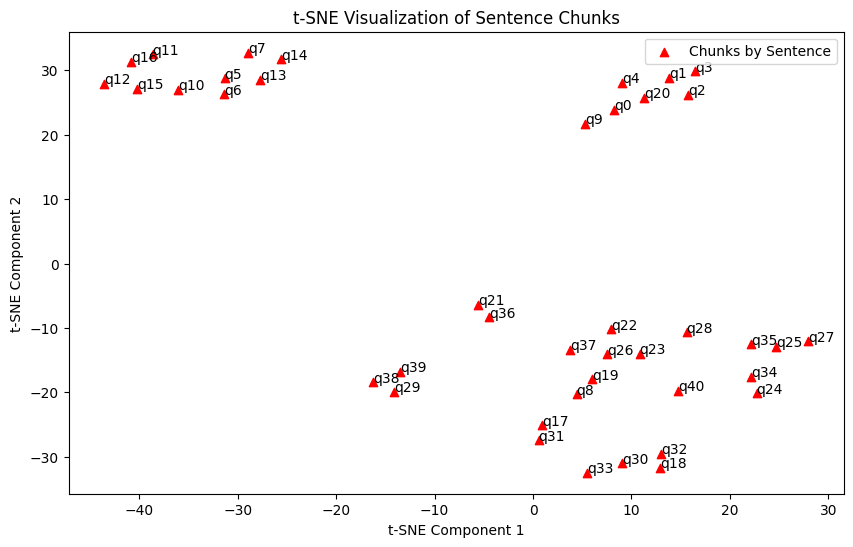

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming the chunk vectors are already prepared (here simulated as random)
# For demonstration, let's simulate vectorization with random vectors

# Generate some sample question labels (replace this with your actual question labels)
question_labels1 = ['q{}'.format(i) for i in range(len(question_embeddings2))]

# Apply t-SNE to each set of vectors
tsne_model_sentence = TSNE(n_components=2, perplexity=min(5, len(question_embeddings2)-1), random_state=42)
reduced_vectors_sentence = tsne_model_sentence.fit_transform(question_embeddings2)

# Plotting - Chunks by Sentence
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors_sentence[:, 0], reduced_vectors_sentence[:, 1], label='Chunks by Sentence', marker='^',color ='red')

# Annotate each point with the corresponding question label
for i, label in enumerate(question_labels1):
    plt.annotate(label, (reduced_vectors_sentence[i, 0], reduced_vectors_sentence[i, 1]))

plt.title('t-SNE Visualization of Sentence Chunks')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


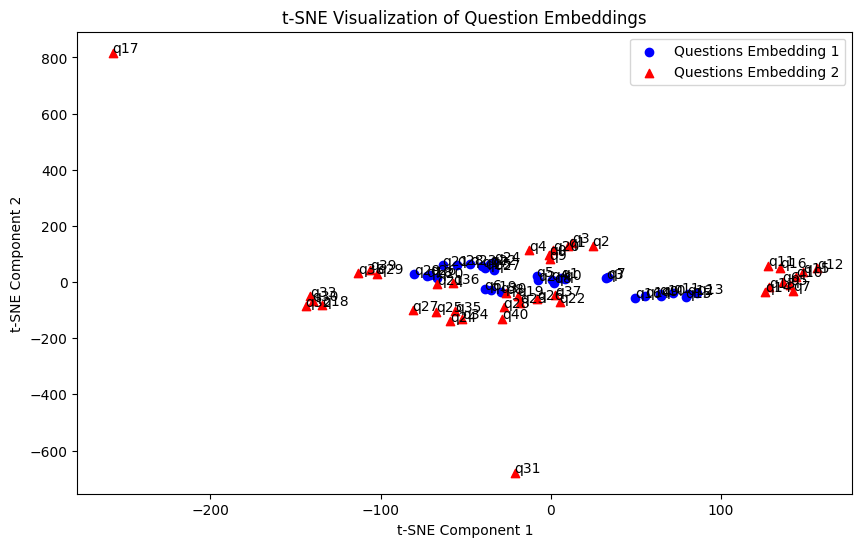

31
41


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming question_embeddings1 and question_embeddings2 are already prepared

# Generate some sample question labels (replace this with your actual question labels)
question_labels1 = ['q{}'.format(i) for i in range(len(question_embeddings1))]
question_labels2 = ['q{}'.format(i) for i in range(len(question_embeddings2))]

# Apply t-SNE to each set of vectors
tsne_model_question1 = TSNE(n_components=2, perplexity=min(3, len(question_embeddings1)-1), random_state=42)
reduced_vectors_question1 = tsne_model_question1.fit_transform(question_embeddings1)

tsne_model_question2 = TSNE(n_components=2, perplexity=min(3, len(question_embeddings2)-1), random_state=42)
reduced_vectors_question2 = tsne_model_question2.fit_transform(question_embeddings2)

# Plotting
plt.figure(figsize=(10, 6))

# Plot question_embeddings1 with blue circles
plt.scatter(reduced_vectors_question1[:, 0], reduced_vectors_question1[:, 1], label='Questions Embedding 1', marker='o', color='blue')

# Plot question_embeddings2 with red triangles
plt.scatter(reduced_vectors_question2[:, 0], reduced_vectors_question2[:, 1], label='Questions Embedding 2', marker='^', color='red')

# Annotate each point with the corresponding question label for question_embeddings1
for i, label in enumerate(question_labels1):
    plt.annotate(label, (reduced_vectors_question1[i, 0], reduced_vectors_question1[i, 1]))

# Annotate each point with the corresponding question label for question_embeddings2
for i, label in enumerate(question_labels2):
    plt.annotate(label, (reduced_vectors_question2[i, 0], reduced_vectors_question2[i, 1]))

plt.title('t-SNE Visualization of Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

print(len(question_embeddings1))
print(len(question_embeddings2))


In [ ]:
#now implementing what will give some progress about our idea

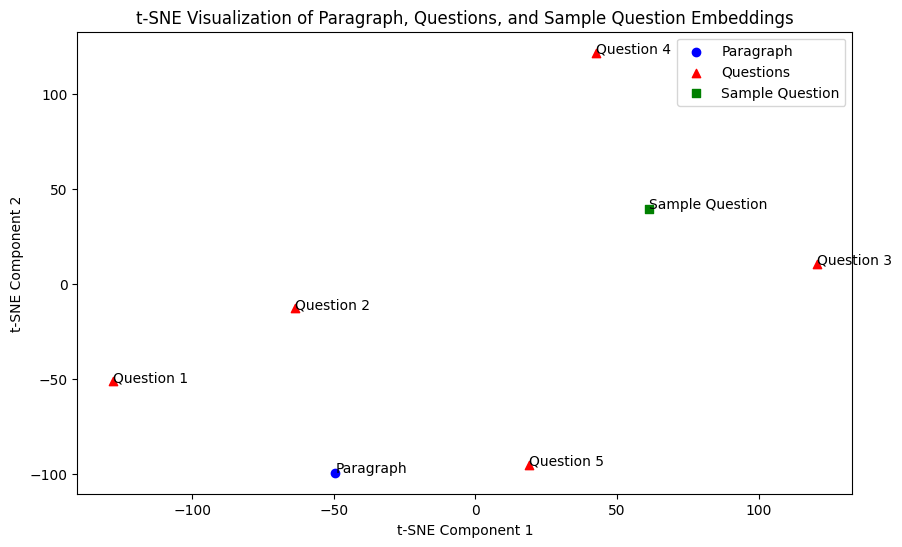

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = "This specification describes the architecture for the 5G system The interaction between network functions is represented in two ways A service based representation where network functions e g AMF within the control plane enables other authorized network functions to access their services This representation also includes point to point reference points where necessary A reference point representation focusing on the interactions between pairs of network functions described by point to point reference point e g N11 between any two network functions e g AMF and SMF is depicted when some interaction exists between these two network functions Service based interfaces are listed in sub clause 4 2 4 Reference points are listed in sub clause 4 2 5 Network functions within the 5G Core Control Plane unless explicitly stated otherwise shall exhibit service based interfaces for services that can be used by other authorized network functions NOTE This will be"

# Questions
questions = [
   "What are the two primary representations used to illustrate the interaction between network functions in the architecture of the 5G system?",
    "How does the service-based representation facilitate communication among network functions within the control plane of the 5G system?",
    "Can you explain the significance of point-to-point reference points in the architecture of the 5G system?",
    "YIn what manner are service-based interfaces and reference points differentiated within the architecture specification?",
    "Why is it mandated that network functions within the 5G Core Control Plane exhibit service-based interfaces unless explicitly specified otherwise"

]

# Sample question
sample_question = "How do service-based interfaces and point-to-point reference points contribute to the overall interoperability and functionality of the 5G system architecture?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(5, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [ ]:
#CHUNK 2

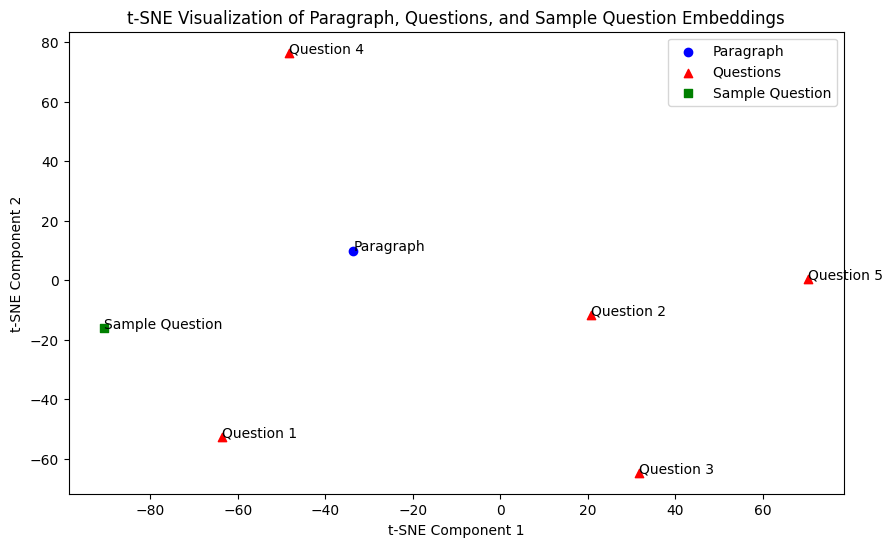

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = "evaluated on a case by case basis when specifying the procedure 4 2 2 Network Functions and entities The 5G System architecture consists of the following network functions NF The functional description of these network functions is specified in clause 6 Authentication Server Function AUSF Core Access and Mobility Management Function AMF Data network DN e g operator services Internet access or 3rd party services Data Storage network function DSF Editor s note Different data storage functions can be used for storing structured data from NEF and storing opaque data from NF How this is captured is FFS Network Exposure Function NEF NF Repository Function NRF Policy Control function PCF Session Management Function SMF Unified Data Management UDM User plane Function UPF User Equipment UE Radio Access Network R AN 4 2 3 Non roaming reference architecture Figure 4 2 3 1 depicts the non roaming reference architecture with service"

# Questions
questions = [
    "How does the specification handle the evaluation of procedures concerning Network Functions and entities within the 5G System architecture?",
    "What are the key network functions (NF) outlined in the architecture specification, and what roles do they play within the 5G system?",
    "Can you elaborate on the role of the Data Storage network function (DSF) within the 5G architecture, considering the potential variety of data it may store?",
    "How is the Non-roaming reference architecture illustrated in the specification, and what insights does it provide into the overall system design?",
    "What function does the Network Exposure Function (NEF) serve within the 5G architecture, and how does it contribute to the system's capabilities?"
]

# Sample question
sample_question = "Can you elaborate on the criteria and process for evaluating network functions on a case-by-case basis, as mentioned in the specification, and how does it relate to specifying procedures within the 5G System architecture?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(5, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


In [ ]:
#CHUNK 3

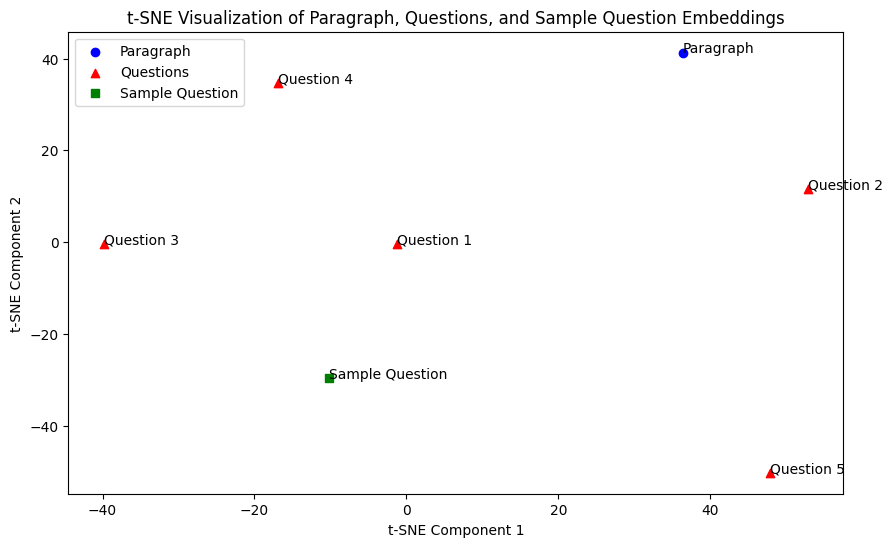

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = """7 Support of non 3GPP access Editor s note This should include non roaming and roaming reference architecture for support of non 3GPP access To start with Rel 15 will include support for untrusted access 4 2 7 1 General Concepts to Support Non 3GPP Access The 5G core network supports the connectivity of UE via non 3GPP access networks e g WLAN access Only the support of non 3GPP access networks deployed outside the NG RAN referred to as standalone non 3GPP accesses is described in this clause In this release of specification 5G core network only supports untrusted non 3GPP accesses The N2 and N3 interfaces are used to connect standalone non 3GPP accesses to 5G core network control plane functions and user plane functions respectively A UE which accesses the 5G core network over a standalone non 3GPP access shall support NAS signalling with 5G core network control plane functions using N1 interface after UE attachment When a UE is connected via a 3GPP RAN and via standalone non 3GPP accesses multiple N1 interfaces shall exist for the UE i e one N1 interface over 3GPP RAN and one N1 interface over non 3GPP access When a UE is simultaneously connected to the same PLMN of 5G core network over 3GPP access and non 3GPP access the UE shall be served by a single AMF Editor s note It is FFS whether there exists a case that a UE is served by different PLMNs simultaneously due to roaming condition e g a UE is roaming and connected over 3GPP access and non 3GPP access through N3IWF located in HPLMN and it is also FFS how the system and the UE behave in such a case Non 3GPP access networks are connected to 5G core network via a Non 3GPP InterWorking Function N3IWF The N3IWF interfaces to 5G core network control plane functions and user plane functions via N2 interface and N3 interface respectively A UE establishes IPSec tunnel with a N3IWF to attach to 5G core network over untrusted non 3GPP access The UE is authenticated by and attached to the 5G core network during the IPSec tunnel establishment procedure Further details for UE attachment to 5G core network over untrusted non 3GPP access are described in clause 5 2 4 Editor s note it is FFS whether the UE attaches to non 3GPP access without establishing any PDU sessions or if the UE always performs an attach with a PDU session establishment Editor s note it is FFS what the UE status the AMF maintains when the UE moves all the PDU sessions to a 3GPP access and whether the N2 connection to the N3IWF is maintained N1 NAS signalling over standalone non 3GPP accesses is protected with the same security mechanism applied for N1 over a 3GPP access Editor s note Name of N3IWF may need to be changed Editor s note How QoS is supported via the N3IWF and untrusted non 3GPP accesses is FFS NOTE 1 The reference architecture in figure 4 2 7 2 1 1 only shows the architecture and the network functions directed connected to non 3GPP access and other parts of the architecture are the same as defined in section 4 2 NOTE 2 The reference architecture in figure 4 2 7 2 1 1 supports both the point to point and service based model reference point between AMF SMF and other NFs not
Chunk 7: represented in the figure NOTE 3 The two N2 instances in Figure 4 2 7 2 1 1 apply to a single AMF for a UE which is simultaneously connected to the same 5G core network over 3GPP access and non 3GPP access NOTE 4 The two N3 instances in Figure 4 2 7 2 1 1 may apply to different UPFs when different PDU sessions are activated over 3GPP access and non 3GPP access VPLMN NOTE 1 The reference architecture in figure 4 2 7 2 2 1 only shows the architecture and the network functions directed connected to support non 3GPP access and other parts of the architecture are the same as defined in section 4 2 with involvement of an SMF and of UPF s in HPLMN in case of Home Routed NOTE 2 The reference architecture in figure 4 2 7 2 2 1 supports both"""

# Questions
questions = [
    "How does the 5G core network support the connectivity of User Equipment (UE) via non-3GPP access networks, and what specific types of access networks are mentioned in the context of this specification?",
    "Can you describe the role of the N2 and N3 interfaces in connecting standalone non-3GPP accesses to the 5G core network's control plane and user plane functions respectively?",
    "What procedures are involved when a UE accesses the 5G core network over standalone non-3GPP access, particularly regarding NAS signaling and attachment procedures?",
    "How does the architecture handle scenarios where a UE is simultaneously connected to the same 5G core network over both 3GPP access and non-3GPP access, and what considerations are mentioned regarding the serving of the UE by a single Access and Mobility Management Function (AMF)?",
    "What security measures are applied to protect NAS signaling over standalone non-3GPP accesses, and what additional considerations are highlighted regarding the support of Quality of Service (QoS) via the Non-3GPP InterWorking Function (N3IWF)?"

]

# Sample question
sample_question = "How does the 5G core network support connectivity for User Equipment (UE) via non-3GPP access networks, and what are the key interfaces involved in facilitating this connectivity, particularly focusing on the establishment of IPSec tunnels and the authentication process?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(5, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


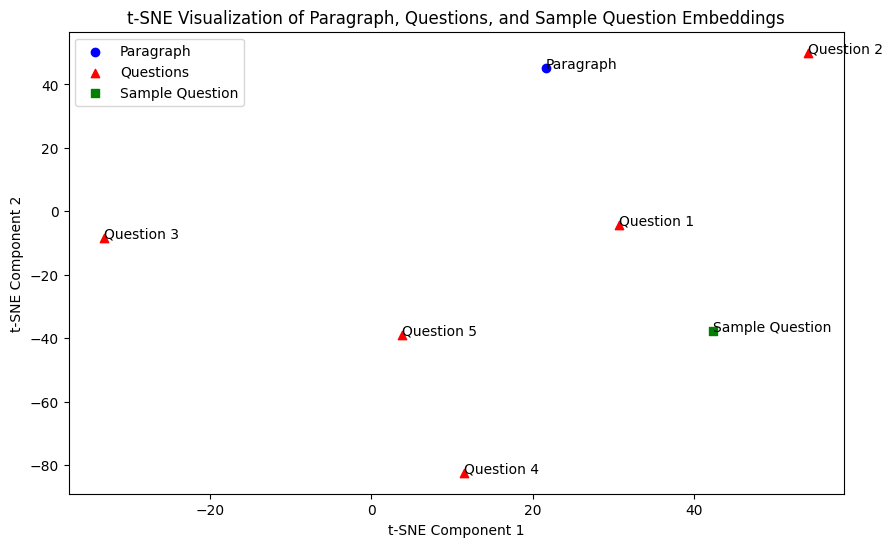

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = "the AMF includes the following functionality to support non 3GPP access networks Support of N2 interface with N3IWF Over this interface some information e g 3GPP cell Identification and procedures e g Hand Over related defined over 3GPP access may not apply and non 3GPP access specific information may be applied that do not apply to 3GPP accesses Editor s note The definition which 3GPP information and procedures are not applicable to N3GPP access and those N3GPP access specific information and procedure needs to be considered are FFS Support of NAS signalling with a UE over N3IWF Some procedures supported by NAS signalling over 3GPP access may be not applicable to untrusted non 3GPP e g Paging access Editor s note The definition which NAS signalling procedures are not applicable to N3GPP access and those N3GPP access specific information and procedure needs to be considered are FFS Support of authentication of UEs connected over N3IWF Management of mobility and authentication security context state s of a UE connected via non 3GPP access or connected via 3GPP and non 3GPP accesses simultaneously Editor s note What the mobility state exactly means for"

# Questions
questions = [
    "How does the Access and Mobility Management Function (AMF) support non-3GPP access networks, particularly regarding the N2 interface with the Non-3GPP InterWorking Function (N3IWF), and what differences in information and procedures are highlighted between 3GPP and non-3GPP accesses?",
    "What specific functions related to NAS signaling does the AMF provide support for over the N3IWF interface, and what considerations are mentioned regarding the applicability of procedures between 3GPP and non-3GPP accesses?",
    "How does the AMF handle the authentication of User Equipments (UEs) connected over the N3IWF, and what role does it play in managing the security context states for UEs connected via non-3GPP access or both 3GPP and non-3GPP accesses simultaneously?",
    "What aspects of mobility state management are pertinent to the functionality of the AMF, especially concerning UEs connected via non-3GPP access, and what further clarification is needed regarding the definition and implications of mobility state?",
    "In what ways does the AMF's support for non-3GPP access networks contribute to the overall security and mobility management within the 5G core network architecture, particularly in scenarios involving UEs accessing both 3GPP and non-3GPP accesses simultaneously?"
]

# Sample question
sample_question = "How does the Access and Mobility Management Function (AMF) in the 5G system address the differences in procedures and information handling between 3GPP and non-3GPP access networks, particularly concerning aspects like cell identification, handover procedures, and NAS signaling?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(5, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


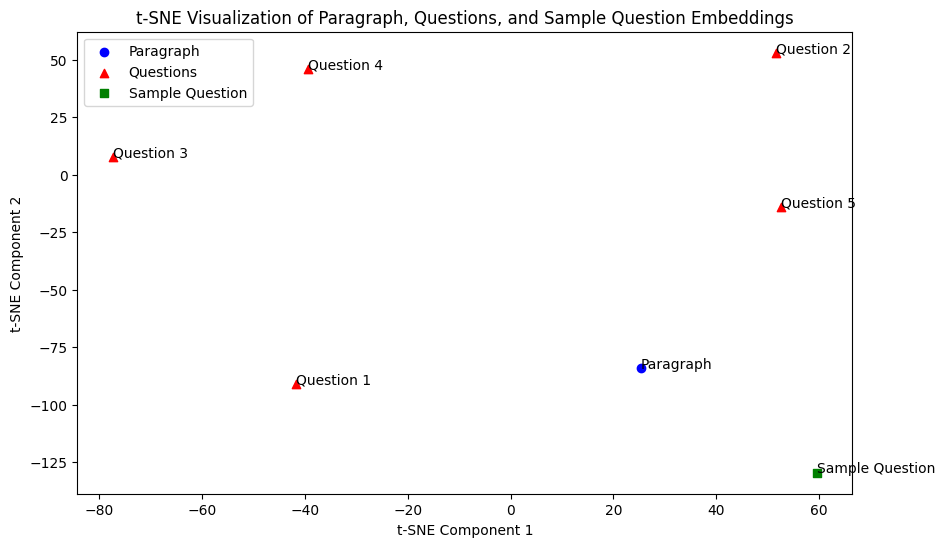

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = "defined in clause 4 2 Y1 Reference point between the UE and the non 3GPP access e g WLAN This depends on the non 3GPP access technology and is outside the scope of 3GPP Y2 Reference point between the untrusted non 3GPP access and the N3IWF for the transport of NWu traffic NWu Reference point between the UE and N3IWF for establishing secure tunnel s between the UE and N3IWF so that control plane and user plane exchanged between the UE and the 5G core network is transferred securely over untrusted non 3GPP access 4 3 Interworking with E UTRAN connected to EPC 4 3 1 Non roaming architecture Figure 4 3 1 1 represents the non roaming architecture for interworking between 5GS and EPC E UTRAN NOTE 1 Nx interface is an inter CN interface between the MME and 5GS AMF in order to enable interworking between EPC and"

# Questions
questions = [
    "What is the purpose of the Y1 reference point between the User Equipment (UE) and the non-3GPP access, and how does its definition vary depending on the specific non-3GPP access technology being used?",
    "Why is the N6 reference point, connecting a UPF acting as an uplink classifier and a local data network, not specified in the current release of the architecture?",
    "Can you explain the significance of reference points N11 and N12, which connect the Access and Mobility Management function (AMF) with the Session Management function (SMF) and the Authentication Server function (AUSF) respectively?",
    "In what scenarios do reference points N15 and N16 come into play, and how do they contribute to the architecture's handling of roaming and non-roaming scenarios?",
    "How does the presence of reference point N9, connecting two Core User Plane Functions (UPFs), enhance the capabilities of the 5G system architecture, particularly in scenarios involving data forwarding and processing?"
]

# Sample question
sample_question = "How does the 5G system ensure secure communication over untrusted non-3GPP access networks, particularly regarding the establishment and utilization of secure tunnels between the User Equipment (UE) and the Non-3GPP InterWorking Function (N3IWF)?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(5, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


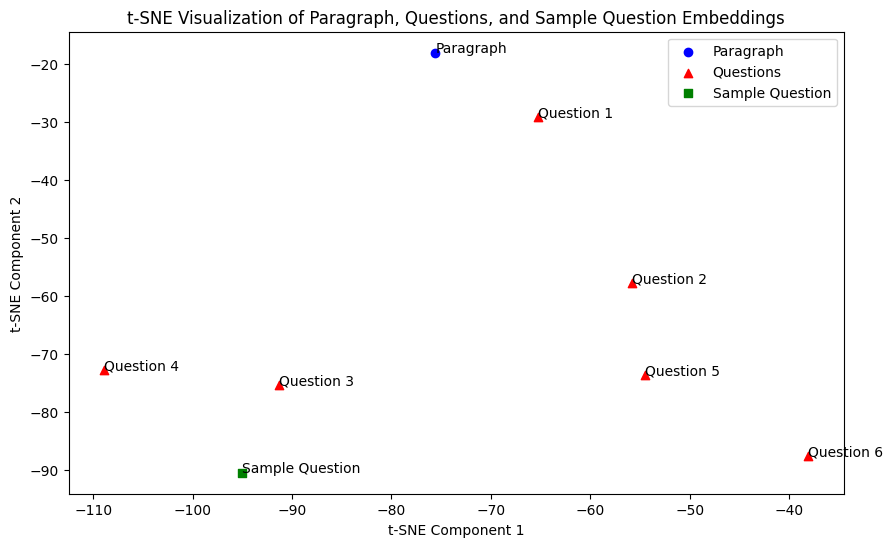

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraph
paragraph = """
Concussion is one of the most common injuries to the brain, affecting about two million children and teens every year. It is a particular kind of injury that happens when a blow to the head or somewhere else on the body makes the brain move back and forth within the skull.

It's possible to get a concussion after what might seem like a minor injury, like a forceful push from behind, or a collision between two players in a football or soccer game.

What are the signs and symptoms of concussion?
Because the injury may not seem that significant from the outside, it's important to know the symptoms of a concussion. There are many different possible symptoms, including

passing out (this could be a sign of a more serious brain injury)
headache
dizziness
changes in vision
feeling bothered by light or noise
confusion or feeling disoriented
memory problems (such as difficulty remembering details of the injury) or difficulty concentrating
balance or coordination problems
mood changes.
Some of these are visible to others and some are felt by the person with the concussion. That's why it's important to know the signs and to ask all the right questions of a child who has had an injury.

Sometimes the symptoms might not be apparent right away, but show up in the days following the injury. The CDC's Heads Up website has lots of great information about how to recognize a concussion.

How can further harm to the brain be avoided?
The main reason it's important to recognize a possible concussion early is that the worst thing you can do after getting a concussion is get another one. The brain is vulnerable after a concussion; if it is injured again, the symptoms can be longer lasting — or even permanent, as in cases of chronic traumatic encephalopathy (CTE), a condition that has been seen in football players and others who have repeated head injuries.

If there is a chance that a child has had a concussion during a sports competition, they must stop playing — and get medical attention. It's important to get medical attention any time there is concern about a possible concussion, both to be sure there isn't a more serious brain injury, and to do a good assessment of the symptoms, so that they can be monitored over time. There are some screening questionnaires that are used by doctors that can be used again in the days and weeks after the concussion to see how the child is improving.

What helps children recover after a concussion?
Experts have struggled with figuring out how to protect the brain after a concussion. For a long time, the recommendation was to rest and do very little at all. This meant not doing any exercise, not going to school, not even reading or watching television. As symptoms improved, the restrictions were lifted gradually.

Over time, though, research showed that not only was this much rest not necessary, it was counterproductive. It turns out that getting kids back into their daily lives, and back into being active, is safe and leads to quicker recovery. Experts still recommend rest and then moving gradually back into activities, but the guidelines are no longer as strict as they once were.

One important note: A medical professional should guide decisions to move from rest to light activity, and then gradually from there to moderate and then regular activities based on how the child is doing. This step-by-step process may extend for days, weeks, or longer, depending on what the child needs. Parents, coaches, and schools can help support a child or teen as they return to school and return to activities and sports.

Some children will be able to get back into regular activities quickly. But for others it can take weeks or even months. Schools and sports trainers should work with children to support them in their recovery. Some children develop post-concussive syndromes with headache, fatigue, and other symptoms. This is rare but can be very disabling.

How can parents help prevent concussions?
It's not always possible to prevent concussions, but there are things that parents can do:

Be sure that children use seat belts and other appropriate restraints in the car.
Have clear safety rules and supervise children when they are playing, especially if they are riding bikes or climbing in trees or on play structures.
Since at least half of concussions happen during sports, it's important that teams and coaches follow safety rules. Coaches should teach techniques and skills to avoid dangerous collisions and other injuries. Talk to your child's coaches about what they are doing to keep players safe. While helmets can prevent many head injuries, they don't prevent concussions.
"""

# Questions
questions = [
    "What are the common signs and symptoms of a concussion, and why is it crucial to recognize them promptly?",
    "How can further damage to the brain be prevented after experiencing a concussion, and what risks are associated with repeated concussions?",
    "What strategies can aid in the recovery process for children following a concussion, and why has the approach to rest and activity changed over time?",
    "What role should medical professionals play in guiding a child's return to activities after a concussion, and how long might this process typically take?",
    "What preventive measures can parents take to reduce the risk of their children experiencing concussions, both in everyday life and during sports activities?",
    "While helmets are essential in preventing many head injuries, why do they not offer complete protection against concussions, and what additional safety measures should be emphasized in sports?"
]

# Sample question
sample_question = "How do the evolving guidelines for managing concussions reflect the shifting understanding of the relationship between rest and activity in the recovery process, and what implications do these changes have for medical professionals, parents, coaches, and schools in supporting children's rehabilitation and reintegration into daily life and activities following a concussion?"

# Tokenize paragraph, questions, and sample question
encoded_input = tokenizer([paragraph] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraph, questions, and sample question
paragraph_embedding = embeddings[0]
question_embeddings = embeddings[1:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(3, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embedding.unsqueeze(0), question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embedding (first point) with a different color
plt.scatter(reduced_vectors[0, 0], reduced_vectors[0, 1], label='Paragraph', color='blue', marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[1:-1, 0], reduced_vectors[1:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='green', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+1, 0], reduced_vectors[i+1, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraph, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


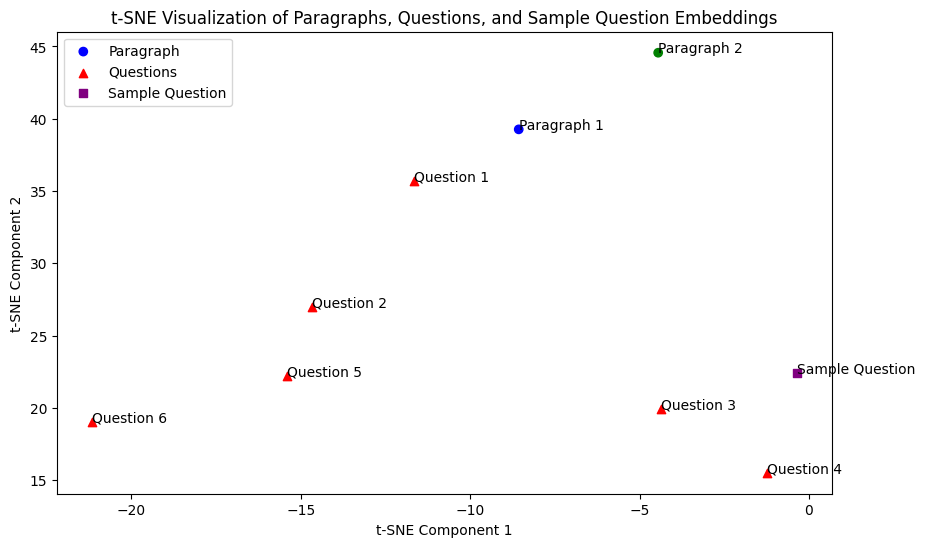

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]  # First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Paragraphs
paragraph1 = """
Concussion is one of the most common injuries to the brain, affecting about two million children and teens every year. It is a particular kind of injury that happens when a blow to the head or somewhere else on the body makes the brain move back and forth within the skull.

It's possible to get a concussion after what might seem like a minor injury, like a forceful push from behind, or a collision between two players in a football or soccer game.

What are the signs and symptoms of concussion?
Because the injury may not seem that significant from the outside, it's important to know the symptoms of a concussion. There are many different possible symptoms, including

passing out (this could be a sign of a more serious brain injury)
headache
dizziness
changes in vision
feeling bothered by light or noise
confusion or feeling disoriented
memory problems (such as difficulty remembering details of the injury) or difficulty concentrating
balance or coordination problems
mood changes.
Some of these are visible to others and some are felt by the person with the concussion. That's why it's important to know the signs and to ask all the right questions of a child who has had an injury.

Sometimes the symptoms might not be apparent right away, but show up in the days following the injury. The CDC's Heads Up website has lots of great information about how to recognize a concussion.

How can further harm to the brain be avoided?
The main reason it's important to recognize a possible concussion early is that the worst thing you can do after getting a concussion is get another one. The brain is vulnerable after a concussion; if it is injured again, the symptoms can be longer lasting — or even permanent, as in cases of chronic traumatic encephalopathy (CTE), a condition that has been seen in football players and others who have repeated head injuries.

If there is a chance that a child has had a concussion during a sports competition, they must stop playing — and get medical attention. It's important to get medical attention any time there is concern about a possible concussion, both to be sure there isn't a more serious brain injury, and to do a good assessment of the symptoms, so that they can be monitored over time. There are some screening questionnaires that are used by doctors that can be used again in the days and weeks after the concussion to see how the child is improving.

What helps children recover after a concussion?
Experts have struggled with figuring out how to protect the brain after a concussion. For a long time, the recommendation was to rest and do very little at all. This meant not doing any exercise, not going to school, not even reading or watching television. As symptoms improved, the restrictions were lifted gradually.

Over time, though, research showed that not only was this much rest not necessary, it was counterproductive. It turns out that getting kids back into their daily lives, and back into being active, is safe and leads to quicker recovery. Experts still recommend rest and then moving gradually back into activities, but the guidelines are no longer as strict as they once were.

One important note: A medical professional should guide decisions to move from rest to light activity, and then gradually from there to moderate and then regular activities based on how the child is doing. This step-by-step process may extend for days, weeks, or longer, depending on what the child needs. Parents, coaches, and schools can help support a child or teen as they return to school and return to activities and sports.

Some children will be able to get back into regular activities quickly. But for others it can take weeks or even months. Schools and sports trainers should work with children to support them in their recovery. Some children develop post-concussive syndromes with headache, fatigue, and other symptoms. This is rare but can be very disabling.

How can parents help prevent concussions?
It's not always possible to prevent concussions, but there are things that parents can do:

Be sure that children use seat belts and other appropriate restraints in the car.
Have clear safety rules and supervise children when they are playing, especially if they are riding bikes or climbing in trees or on play structures.
Since at least half of concussions happen during sports, it's important that teams and coaches follow safety rules. Coaches should teach techniques and skills to avoid dangerous collisions and other injuries. Talk to your child's coaches about what they are doing to keep players safe. While helmets can prevent many head injuries, they don't prevent concussions.
"""

paragraph2 = """
Mahatma Gandhi (born October 2, 1869, Porbandar, India—died January 30, 1948, Delhi) Indian lawyer, politician, social activist, and writer who became the leader of the nationalist movement against the British rule of India. As such, he came to be considered the father of his country. Gandhi is internationally esteemed for his doctrine of nonviolent protest (satyagraha) to achieve political and social progress.

In the eyes of millions of his fellow Indians, Gandhi was the Mahatma (“Great Soul”). The unthinking adoration of the huge crowds that gathered to see him all along the route of his tours made them a severe ordeal; he could hardly work during the day or rest at night. “The woes of the Mahatmas,” he wrote, “are known only to the Mahatmas.” His fame spread worldwide during his lifetime and only increased after his death. The name Mahatma Gandhi is now one of the most universally recognized on earth.

Youth
Gandhi was the youngest child of his father’s fourth wife. His father—Karamchand Gandhi, who was the dewan (chief minister) of Porbandar, the capital of a small principality in western India (in what is now Gujarat state) under British suzerainty—did not have much in the way of a formal education. He was, however, an able administrator who knew how to steer his way between the capricious princes, their long-suffering subjects, and the headstrong British political officers in power.

Gandhi’s mother, Putlibai, was completely absorbed in religion, did not care much for finery or jewelry, divided her time between her home and the temple, fasted frequently, and wore herself out in days and nights of nursing whenever there was sickness in the family. Mohandas grew up in a home steeped in Vaishnavism—worship of the Hindu god Vishnu—with a strong tinge of Jainism, a morally rigorous Indian religion whose chief tenets are nonviolence and the belief that everything in the universe is eternal. Thus, he took for granted ahimsa (noninjury to all living beings), vegetarianism, fasting for self-purification, and mutual tolerance between adherents of various creeds and sects.

"""

# Questions
questions = [
    "What are the common signs and symptoms of a concussion, and why is it crucial to recognize them promptly?",
    "How can further damage to the brain be prevented after experiencing a concussion, and what risks are associated with repeated concussions?",
    "What strategies can aid in the recovery process for children following a concussion, and why has the approach to rest and activity changed over time?",
    "What role should medical professionals play in guiding a child's return to activities after a concussion, and how long might this process typically take?",
    "What preventive measures can parents take to reduce the risk of their children experiencing concussions, both in everyday life and during sports activities?",
    "While helmets are essential in preventing many head injuries, why do they not offer complete protection against concussions, and what additional safety measures should be emphasized in sports?"
]

# Sample question
sample_question = "How do the evolving guidelines for managing concussions reflect the shifting understanding of the relationship between rest and activity in the recovery process, and what implications do these changes have for medical professionals, parents, coaches, and schools in supporting children's rehabilitation and reintegration into daily life and activities following a concussion?"

# Tokenize paragraphs, questions, and sample question
encoded_input = tokenizer([paragraph1, paragraph2] + questions + [sample_question], padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)

# Separate embeddings for paragraphs, questions, and sample question
paragraph_embeddings = embeddings[:2]
question_embeddings = embeddings[2:-1]
sample_question_embedding = embeddings[-1]

# Apply t-SNE to embeddings
tsne_model = TSNE(n_components=2, perplexity=min(3, len(question_embeddings)-1), random_state=42)
reduced_vectors = tsne_model.fit_transform(torch.cat([paragraph_embeddings, question_embeddings, sample_question_embedding.unsqueeze(0)]))

# Plotting
plt.figure(figsize=(10, 6))

# Plot paragraph embeddings (first two points) with different colors
plt.scatter(reduced_vectors[:2, 0], reduced_vectors[:2, 1], label='Paragraph', color=['blue', 'green'], marker='o')

# Plot question embeddings (remaining points) with a different color
plt.scatter(reduced_vectors[2:-1, 0], reduced_vectors[2:-1, 1], label='Questions', color='red', marker='^')

# Plot sample question embedding (last point) with a different color
plt.scatter(reduced_vectors[-1, 0], reduced_vectors[-1, 1], label='Sample Question', color='purple', marker='s')

# Annotate each point with the corresponding label
plt.annotate('Paragraph 1', (reduced_vectors[0, 0], reduced_vectors[0, 1]))
plt.annotate('Paragraph 2', (reduced_vectors[1, 0], reduced_vectors[1, 1]))
for i, question in enumerate(questions):
    plt.annotate('Question {}'.format(i+1), (reduced_vectors[i+2, 0], reduced_vectors[i+2, 1]))
plt.annotate('Sample Question', (reduced_vectors[-1, 0], reduced_vectors[-1, 1]))

plt.title('t-SNE Visualization of Paragraphs, Questions, and Sample Question Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
